In [21]:
import os
import warnings
# os.chdir("1_feature_engineering")
exec(open("extract_review_features.py").read())
exec(open("iterative_stratification.py").read())

In [16]:
warnings.filterwarnings("ignore")

feature_matrix = produce_feature_matrix(data2)

Preprocessing Stem & Join (P): 3.329643487930298
Preprocessing No Stem (P): 2.9900412559509277
Preprocessing No Stem & Punct (P): 3.01397967338562
TFIDF: 0.09218120574951172
Topics: 0.3728601932525635
Metadata: 0.6783578395843506
Syntax: 32.12059664726257
Embeddings: 78.65726017951965


In [17]:
list(feature_matrix.columns)

['text_formatted',
 'sen_len',
 'sen_avg_len',
 'sen_med_len',
 'sen_money_len',
 'sen_num_len',
 'NOUN',
 'VERB',
 'ADJ',
 'ADV',
 '.',
 'ADP',
 'NUM',
 'PRON',
 'PRT',
 'DET',
 'CONJ',
 'X',
 'NOUN_VERB',
 'NOUN_ADJ',
 'NOUN_ADV',
 'NOUN_.',
 'NOUN_ADP',
 'NOUN_NUM',
 'NOUN_PRON',
 'NOUN_PRT',
 'NOUN_DET',
 'NOUN_CONJ',
 'NOUN_X',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_ADV',
 'VERB_.',
 'VERB_ADP',
 'VERB_NUM',
 'VERB_PRON',
 'VERB_PRT',
 'VERB_DET',
 'VERB_CONJ',
 'VERB_X',
 'ADJ_NOUN',
 'ADJ_VERB',
 'ADJ_ADV',
 'ADJ_.',
 'ADJ_ADP',
 'ADJ_NUM',
 'ADJ_PRON',
 'ADJ_PRT',
 'ADJ_DET',
 'ADJ_CONJ',
 'ADJ_X',
 'ADV_NOUN',
 'ADV_VERB',
 'ADV_ADJ',
 'ADV_.',
 'ADV_ADP',
 'ADV_NUM',
 'ADV_PRON',
 'ADV_PRT',
 'ADV_DET',
 'ADV_CONJ',
 'ADV_X',
 '._NOUN',
 '._VERB',
 '._ADJ',
 '._ADV',
 '._ADP',
 '._NUM',
 '._PRON',
 '._PRT',
 '._DET',
 '._CONJ',
 '._X',
 'ADP_NOUN',
 'ADP_VERB',
 'ADP_ADJ',
 'ADP_ADV',
 'ADP_.',
 'ADP_NUM',
 'ADP_PRON',
 'ADP_PRT',
 'ADP_DET',
 'ADP_CONJ',
 'ADP_X',
 'NUM_NOUN',
 '

In [18]:
feature_matrix.head()

,text_formatted,sen_len,sen_avg_len,sen_med_len,sen_money_len,sen_num_len,NOUN,VERB,ADJ,ADV,...,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99
0,In my dream world this amazing incredible plac...,65,4.062500,5.0,0,0,-0.889222,-0.718838,-0.823667,-0.943411,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.236909,0.001000,0.001000,0.001000,0.001000
1,Pretty good ramen. It honestly wasn't quite a...,100,4.347826,4.0,1,0,-0.791382,-0.641034,-0.823667,0.057682,...,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526
2,First time there chicken for both me and my wi...,480,4.571429,5.0,1,6,0.627291,0.992857,0.397608,0.391380,...,0.193696,0.000132,0.000132,0.122451,0.120293,0.000132,0.000132,0.000132,0.000132,0.000132
3,The staff is friendly and service is done quic...,98,4.454545,4.5,0,0,-0.693543,-0.718838,-0.917611,-0.776562,...,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556
4,I originally gave Main Ingredient two stars ba...,898,4.338164,4.0,1,6,2.143805,0.759444,2.370435,1.225624,...,0.084085,0.000090,0.000090,0.000090,0.000090,0.017087,0.000090,0.000090,0.052086,0.027683


In [62]:
def train_model(feature_matrix, target, validation_x, validation_y, target_string):
    """Train a classifier on review data to get topic classes

    Args:
        feature_matrix - features
        target - target class data
        validation_x - validation features
        validation_y - validation target
        target_string - column name of intended target

    Returns:
        accuracy scores, conf matrices, clf
    """
    clf = RandomForestClassifier(n_estimators=1000,
                                 max_depth=3,
                                 min_samples_leaf=10,
                                 max_features=0.6,
                                 random_state=10191994,
                                 n_jobs=-1)

    try:
        score = clf.fit(feature_matrix[:, 1:], # because first column is raw text
                        target).score(
                        validation_x[:, 1:],
                        validation_y)

        conf_mat = confusion_matrix(validation_y,
            clf.predict(validation_x[:, 1:]))

        clf.fit(feature_matrix[:, 1:], target)
    except: # np array versus dataframe
        score = clf.fit(feature_matrix.iloc[:, 1:], # because first column is raw text
                        target).score(
                        validation_x[:, 1:],
                        validation_y)

        conf_mat = confusion_matrix(validation_y,
            clf.predict(validation_x[:, 1:]))

        clf.fit(feature_matrix.iloc[:, 1:], target)

    return score, conf_mat, clf

In [33]:
feature_matrix = feature_matrix.fillna(0)

target = data[["food", "service", "price", "ambiance"]]
feature_names = feature_matrix.columns[1:]

In [27]:
import copy
import glob
import logging
import numpy as np
import os
import pickle
import random
import ujson
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

## Food

In [37]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target[["food"]]),
    test_size=0.2,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.25, # 0.25 * 0.8 = 0.2
    random_state=10191994)

food_score, food_conf_mat, food_clf = train_model(X_train, y_train, X_validation, y_validation, "food")

In [42]:
print(food_score)
print(food_conf_mat)
sorted(list(zip(feature_names, food_clf.feature_importances_)), key=lambda x: -x[1])

0.9238095238095239
[[  3  16]
 [  0 191]]


[('delicious_3avg_sim', 0.3648696589434439),
 ('topic_2', 0.1458002637527243),
 ('food_3avg_sim', 0.0870030789007157),
 ('topic_70', 0.06317116909690455),
 ('room', 0.049194145402257666),
 ('much', 0.027024718241398935),
 ('topic_16', 0.02298481378393061),
 ('patio_3avg_similarity', 0.021068266379275814),
 ('topic_32', 0.01760225269068093),
 ('topic_94', 0.014792265940810869),
 ('price_3avg_similarity', 0.012434775996221717),
 ('topic_55', 0.011130716324499072),
 ('topic_86', 0.009385318064680941),
 ('food', 0.009367139665301253),
 ('bar', 0.009178848595251065),
 ('topic_44', 0.008326721481656666),
 ('topic_39', 0.006675741707275443),
 ('staff_3avg_sim', 0.006044859486089141),
 ('go', 0.005703118273329708),
 ('NUM', 0.005700531950733774),
 ('sen_avg_len', 0.005653384474287422),
 ('loud_3avg_similarity', 0.005159107896395997),
 ('topic_31', 0.004669751321707638),
 ('us', 0.004649708212059989),
 ('cost_3avg_similarity', 0.004506303252950857),
 ('topic_29', 0.003967130483694716),
 ('made'

## Service

In [44]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target[["service"]]),
    test_size=0.2,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.25, # 0.25 * 0.8 = 0.2
    random_state=10191994)

service_score, service_conf_mat, service_clf = train_model(X_train, y_train, X_validation, y_validation, "service")

In [45]:
print(service_score)
print(service_conf_mat)
sorted(list(zip(feature_names, service_clf.feature_importances_)), key=lambda x: -x[1])

0.8523809523809524
[[ 65  11]
 [ 20 114]]


[('service_3avg_sim', 0.41796076882535055),
 ('staff_3avg_sim', 0.31105564068475827),
 ('servic', 0.10295320472586372),
 ('topic_22', 0.02380539149841715),
 ('topic_94', 0.01558073153407102),
 ('price_3avg_similarity', 0.009272221244868022),
 ('topic_16', 0.008145377511843556),
 ('wait', 0.007283017237066532),
 ('ambiance_3avg_similarity', 0.004531752980820245),
 ('topic_72', 0.003907339263472803),
 ('topic_48', 0.003894217399263512),
 ('topic_93', 0.003364900009923286),
 ('back', 0.0032863215540272586),
 ('cost_3avg_similarity', 0.0030961788247315706),
 ('topic_15', 0.0027818943738299054),
 ('patio_3avg_similarity', 0.002539050650491043),
 ('topic_6', 0.002464328209929954),
 ('topic_31', 0.0024137526317044985),
 ('salad', 0.002153923778295863),
 ('topic_82', 0.0020329493604171033),
 ('topic_65', 0.0020191985597256953),
 ('tast', 0.0019853417013002013),
 ('sauc', 0.0018801423059325376),
 ('food_3avg_sim', 0.0018712296374749327),
 ('topic_33', 0.0016637967759553273),
 ('topic_87', 0.001

## Price

In [49]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target[["price"]]),
    test_size=0.2,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.25, # 0.25 * 0.8 = 0.2
    random_state=10191994)

price_score, price_conf_mat, price_clf = train_model(X_train, y_train, X_validation, y_validation, "price")

In [50]:
print(price_score)
print(price_conf_mat)
sorted(list(zip(feature_names, price_clf.feature_importances_)), key=lambda x: -x[1])

0.8571428571428571
[[142  13]
 [ 17  38]]


[('price_3avg_similarity', 0.4258095576261685),
 ('cost_3avg_similarity', 0.18295296605677555),
 ('price', 0.10080527726351549),
 ('sen_money_len', 0.04279965192263399),
 ('topic_39', 0.011457004236675809),
 ('topic_91', 0.010774914212626415),
 ('topic_12', 0.009760605738685405),
 ('food', 0.009164147531793888),
 ('topic_8', 0.008521575363648943),
 ('sen_num_len', 0.008217488525925475),
 ('topic_34', 0.007728207047185126),
 ('topic_72', 0.007075206548088562),
 ('topic_94', 0.0063952871656254105),
 ('topic_13', 0.006194819123671682),
 ('topic_18', 0.0060080647661871645),
 ('food_3avg_sim', 0.005902964228578754),
 ('topic_55', 0.004869316723462401),
 ('topic_78', 0.004302552763539017),
 ('topic_63', 0.004055729558420308),
 ('VERB', 0.004008434689820275),
 ('topic_38', 0.003989827116020427),
 ('delicious_3avg_sim', 0.0034983560150440825),
 ('topic_28', 0.0032016917885838887),
 ('topic_44', 0.003169187936697835),
 ('topic_33', 0.0030392917133432572),
 ('ambiance_3avg_similarity', 0.0028939

## Ambiance

In [51]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target[["ambiance"]]),
    test_size=0.2,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.25, # 0.25 * 0.8 = 0.2
    random_state=10191994)

ambiance_score, ambiance_conf_mat, ambiance_clf = train_model(X_train, y_train, X_validation, y_validation, "ambiance")

In [52]:
print(ambiance_score)
print(ambiance_conf_mat)
sorted(list(zip(feature_names, ambiance_clf.feature_importances_)), key=lambda x: -x[1])

0.7952380952380952
[[107  18]
 [ 25  60]]


[('ambiance_3avg_similarity', 0.47359820286841037),
 ('patio_3avg_similarity', 0.2388523684333071),
 ('loud_3avg_similarity', 0.12837444039062043),
 ('topic_0', 0.030957936580621456),
 ('topic_8', 0.006459127363556481),
 ('topic_30', 0.006111293307608582),
 ('say', 0.005723104032553006),
 ('topic_13', 0.005343854467514779),
 ('topic_22', 0.0045744174222301474),
 ('topic_25', 0.0044825383539883225),
 ('topic_70', 0.004370282395641894),
 ('service_3avg_sim', 0.003399747450626089),
 ('topic_94', 0.0032246070645409308),
 ('staff_3avg_sim', 0.0032066295481948254),
 ('topic_6', 0.0020526855124909367),
 ('topic_18', 0.0020216934316661995),
 ('NOUN_VERB', 0.0019521814763801223),
 ('topic_85', 0.0019094328144596197),
 ('VERB', 0.0017073616509912552),
 ('topic_55', 0.0016876784140973753),
 ('topic_63', 0.001513956145163703),
 ('server', 0.0014655686777743865),
 ('experi', 0.0014390323256249949),
 ('topic_84', 0.001398056633253363),
 ('topic_50', 0.0013976677135218662),
 ('topic_91', 0.0013967262

In [80]:
from sklearn.metrics import roc_curve, auc

In [86]:
def train_model2(feature_matrix, target, validation_x, validation_y, target_string):
    """Train a classifier on review data to get topic classes

    Args:
        feature_matrix - features
        target - target class data
        validation_x - validation features
        validation_y - validation target
        target_string - column name of intended target

    Returns:
        accuracy scores, conf matrices, clf
    """
    clf = RandomForestClassifier(n_estimators=1000,
                                 max_depth=3,
                                 min_samples_leaf=10,
                                 max_features=0.6,
                                 random_state=10191994,
                                 n_jobs=-1)

    try:
        score = clf.fit(feature_matrix[:, 1:], # because first column is raw text
                        target).score(
                        validation_x[:, 1:],
                        validation_y)

        conf_mat = confusion_matrix(validation_y,
            clf.predict(validation_x[:, 1:]))
        
        roc = roc_curve(validation_y,
                        clf.predict_proba(validation_x[:, 1:])[:,1])

        clf.fit(feature_matrix[:, 1:], target)
    except: # np array versus dataframe
        score = clf.fit(feature_matrix.iloc[:, 1:], # because first column is raw text
                        target).score(
                        validation_x[:, 1:],
                        validation_y)

        conf_mat = confusion_matrix(validation_y,
            clf.predict(validation_x[:, 1:]))
        
        roc = roc_curve(validation_y,
                        clf.predict_proba(validation_x[:, 1:])[:,1])

        clf.fit(feature_matrix.iloc[:, 1:], target)

    return score, conf_mat, roc, clf

In [87]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target[["ambiance"]]),
    test_size=0.2,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.25, # 0.25 * 0.8 = 0.2
    random_state=10191994)

ambiance_score, ambiance_conf_mat, ambiance_roc, ambiance_clf = train_model2(X_train, y_train, X_validation, y_validation, "ambiance")

In [88]:
fpr, tpr, _ = ambiance_roc

In [78]:
import matplotlib.pyplot as plt

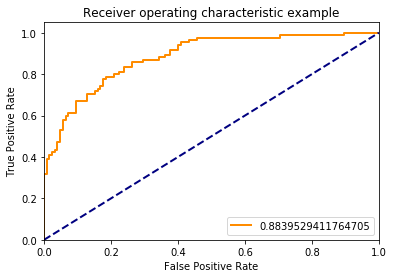

In [91]:
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
        label="{}".format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()